### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [22]:
data = pd.read_csv('data/coupons.csv')

In [23]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [24]:
missing_columns = data.columns[data.isnull().any()].tolist()
print("Columns with missing data:", missing_columns)

Columns with missing data: ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


In [25]:
data.count()

destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expiration              12684
gender                  12684
age                     12684
maritalStatus           12684
has_children            12684
education               12684
occupation              12684
income                  12684
car                       108
Bar                     12577
CoffeeHouse             12467
CarryAway               12533
RestaurantLessThan20    12554
Restaurant20To50        12495
toCoupon_GEQ5min        12684
toCoupon_GEQ15min       12684
toCoupon_GEQ25min       12684
direction_same          12684
direction_opp           12684
Y                       12684
dtype: int64

Missing data counts in each column:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


<AxesSubplot:>

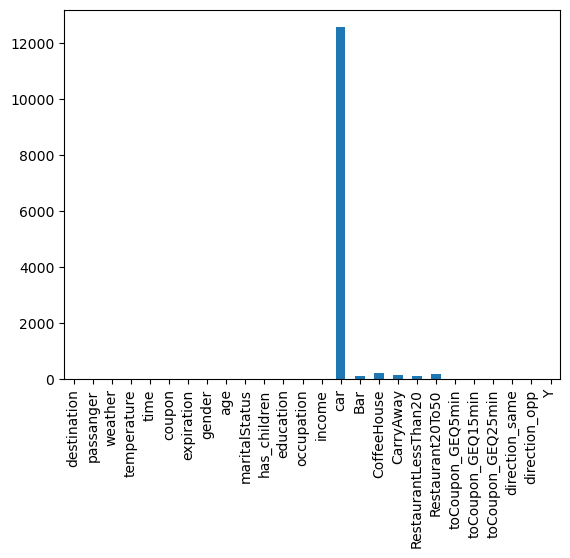

In [26]:
# Count missing data in each column
missing_counts = data.isnull().sum()
print("Missing data counts in each column:")
print(missing_counts)
missing_counts.plot(kind='bar')

3. Decide what to do about your missing data -- drop, replace, other...
### Variable car has more 98% of the data missing so the column should be dropped out. 

In [27]:
newdata=data.drop("car",axis=1)

4. What proportion of the total observations chose to accept the coupon? 



In [40]:
proportion=(newdata.loc[newdata['Y']==1]['Y'].count()/newdata['Y'].count()).round(2)
print(proportion,"is the proportion.")

0.57 is the proportion.


5. Use a bar plot to visualize the `coupon` column.

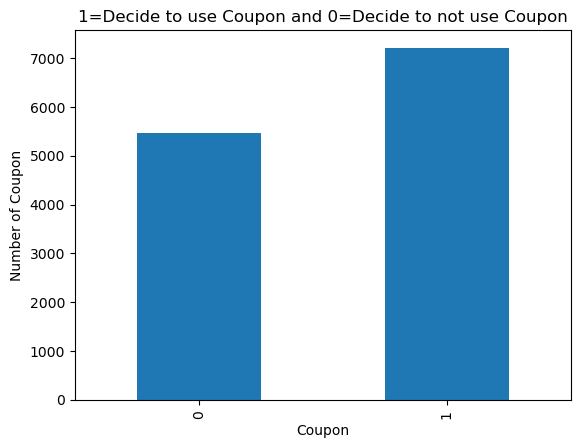

In [56]:
newdata.groupby('Y')["Y"].count().plot(kind='bar')

plt.xlabel("Coupon")
plt.ylabel("Number of Coupon")
plt.title("1=Decide to use Coupon and 0=Decide to not use Coupon");

6. Use a histogram to visualize the temperature column.

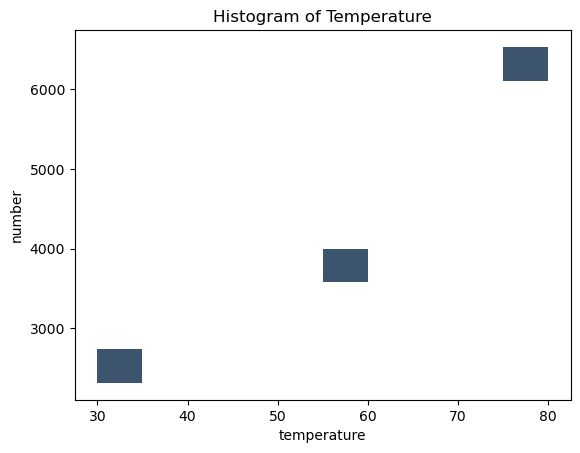

In [98]:
x=newdata.groupby('temperature')[["temperature"]].count()
x=x.rename(columns={'temperature':'number'})
x=x.reset_index()
sns.histplot(data=x,x='temperature',y='number',bins=10);
plt.title('Histogram of Temperature');

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [106]:
BarCoup=newdata.loc[newdata['coupon']=='Bar']

2. What proportion of bar coupons were accepted?


In [107]:
prop=(BarCoup.loc[BarCoup['Y']==1]['Y'].count()/BarCoup['Y'].count()).round(2)
print(prop,"is the proportion.")

0.41 is the proportion.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [219]:
yy=BarCoup.loc[BarCoup['Y']==1]
yy;

In [222]:
tree_or_Few=yy.loc[(yy['Bar']=='1~3')|(yy['Bar']=='less1')]
morethan3=yy.loc[(yy['Bar']=='4~8')|(yy['Bar']=='gt8')]
acceptRate3OrLess=(tree_or_Few['Bar'].count())/(yy['Bar'].count())
acceptRateMorethan3=(morethan3['Bar'].count())/(yy['Bar'].count())
print("More than 3 time acceptance rate is :",acceptRateMorethan3)
print("less than 3 time acceptance rate is :",acceptRate3OrLess,)
print("The acceptance rate of those who went to a bar 3 or fewer times a month is much higher, ")
print("the ones who went more than 3 times a month.")

More than 3 time acceptance rate is : 0.18681318681318682
less than 3 time acceptance rate is : 0.6227106227106227
The acceptance rate of went to a bar 3 or fewer times a month is more than, 
the ones who went more than 3 times a month.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [224]:
driverMorethanOnce=yy.loc[(yy['CarryAway']!='less1')&(yy['CarryAway']!='never')&(yy['age']>'25')]
driverOver25=driverMorethanOnce['CarryAway'].count() ## more than once and over age 25
xx=yy['CarryAway'].count() #Total number
AllOthers=xx-driverOver25 # All the others
print(driverOver25)
print(AllOthers)
print(xx)

521
290
811


In [225]:
AcceptanceOver25=driverOver25/xx
AcceptanceAllovers=AllOthers/xx
print("Acceptance Rate of drivers who went there more than once and are over 25 of age is :",AcceptanceOver25)
print("Acceptance Rate of All others drivers :",AcceptanceAllovers)
print("Acceptance Rate of those over 25 of age is almost twice larger than the one of all others.")

Acceptance Rate of drivers who went there more than once and are over 25 of age is : 0.6424167694204685
Acceptance Rate of All others drivers : 0.35758323057953145
Acceptance Rate of those over 25 of age is almost twice larger than one of all others.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [227]:
driver5=yy.loc[(yy['CarryAway']!='less1')&(yy['CarryAway']!='never')
                    &(yy['occupation']!='Kid(s)')&(yy['passanger']!='Farming Fishing & Forestry')]
y=driver5['CarryAway'].count()
acceptance=y/xx
print("The acceptance rate is",acceptance,"which is larger than the ones of all drivers specified above.")

The acceptance rate is 0.8594327990135635 which is larger than the ones of all drivers specified above.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [228]:
driverNotw=yy.loc[(yy['CarryAway']!='less1')&(yy['CarryAway']!='never')
                    &(yy['occupation']!='Kid(s)')&(yy['maritalStatus']!='Widowed')]
driver_u30=yy.loc[(yy['CarryAway']!='less1')&(yy['CarryAway']!='never')
                    &(yy['age']<'30')]
driver_uR=yy.loc[(yy['RestaurantLessThan20']=='4~8')|(yy['RestaurantLessThan20']=='gt8')
                     &(yy['income']<'50000')]

In [230]:
#Acceptance Rate
NotWidowed=driverNotw['CarryAway'].count()/xx
Under_30=driver_u30['CarryAway'].count()/xx
Under50k=driver_uR['CarryAway'].count()/xx
print("Acceptance Rate Not Widowed is :",NotWidowed)
print("Acceptance Rate Under 30 is :",Under_30)
print("Acceptance Rate Under 50k is :",Under50k)
print("Acceptance Rate for Not Widowed is much higher than the others two categories.")

Acceptance Rate Not Widowed is : 0.8508014796547472
Acceptance Rate Under 30 is : 0.43896424167694204
Acceptance Rate Under 50k is : 0.37731196054254007
Acceptance Rate for Not Widowed is much higher than the others two categories.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

##### Drivers who accepted the bar coupons are most likey to go to the bar and the majority is not Widowed.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Let's explore the coffee house coupon

In [200]:
anotherCoup=newdata.loc[newdata['coupon']=='Coffee House']
BarCoup.groupby('passanger')[['passanger']].count()

,passanger
passanger,
Alone,1200
Friend(s),337
Kid(s),206
Partner,274


In [ ]:
#

In [207]:
#Coffee Coupon
anotherCoup=newdata.loc[newdata['coupon']=='Coffee House']
anotherCoup['coupon'].count()

3996

In [213]:
#Accepted coffee coupon
CoffeeCoupAcc=anotherCoup[anotherCoup['Y']==1]

In [215]:
#Passanger who accepted Coffee Coupon
data=CoffeeCoupAcc.groupby('passanger')[['passanger']].count()
#Calculate proportion
total_count = data['passanger'].sum()

# Calculate the proportion for each category
data['proportion'] = data['passanger'] / total_count

# Display the DataFrame with proportions
data

,passanger,proportion
passanger,,
Alone,988,0.495238
Friend(s),733,0.367419
Kid(s),100,0.050125
Partner,174,0.087218


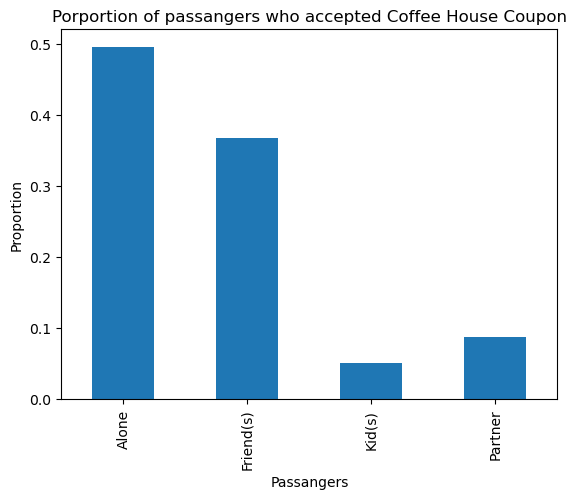

In [233]:
data['proportion'].plot(kind='bar')
plt.ylabel("Proportion")
plt.xlabel('Passangers')
plt.title("Porportion of passangers who accepted Coffee House Coupon");